In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [26]:
def corr_fun_2 (samples, max_tau):
    c_f = []
    n_samples = len(samples)
    for tau in range(max_tau):
        avg = np.mean(samples[:n_samples-tau])
        avg_lag = np.mean(samples[tau:])
        var_no_lag = np.sqrt(np.var(samples[:n_samples-tau]))
        var_lag = np.sqrt(np.var(samples[tau:]))
        s = 0
        for t in range(n_samples-tau):
            s += samples[t]*samples[t+tau]
        s = s/(n_samples-tau)
        c_f.append((s-avg*avg_lag)/(var_no_lag*var_lag))
    return np.array(c_f)  

In [27]:
def lag_p_autocovariance(tau, samples):
    n_samples = len(samples)
    avg = np.mean(samples[:n_samples-tau])
    avg_lag = np.mean(samples[tau:])
    var_no_lag = np.sqrt(np.var(samples[:n_samples-tau]))
    var_lag = np.sqrt(np.var(samples[tau:]))
    s = 0
    for t in range(n_samples-tau):
        s += samples[t]*samples[t+tau]
    s = s/(n_samples-tau)
    return(s-avg*avg_lag)/(var_no_lag*var_lag)

In [58]:
RG2 = np.loadtxt("RG2_433.txt")
M = np.loadtxt("magnetization_433.txt")
E = np.loadtxt("energies_433.txt")

In [59]:
spins = np.loadtxt("final_spinconf_433.txt")

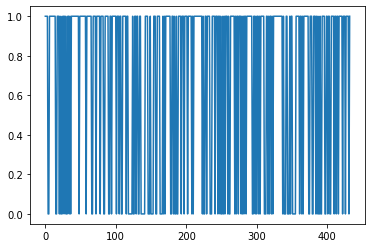

In [60]:
plt.plot(spins)

In [61]:
spins_corr = corr_fun_2(spins,20)

In [62]:
abs(lag_p_autocovariance(5,spins))

0.054017293306130365

In [63]:
spins_corr[5]

0.054017293306130365

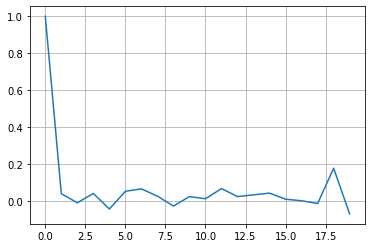

In [64]:
plt.plot(spins_corr)
plt.grid()

In [65]:
rg2_corr = corr_fun_2(RG2,2000)

In [66]:
ene_corr = corr_fun_2(E,2000)

In [67]:
magne_corr = corr_fun_2(M,2000)

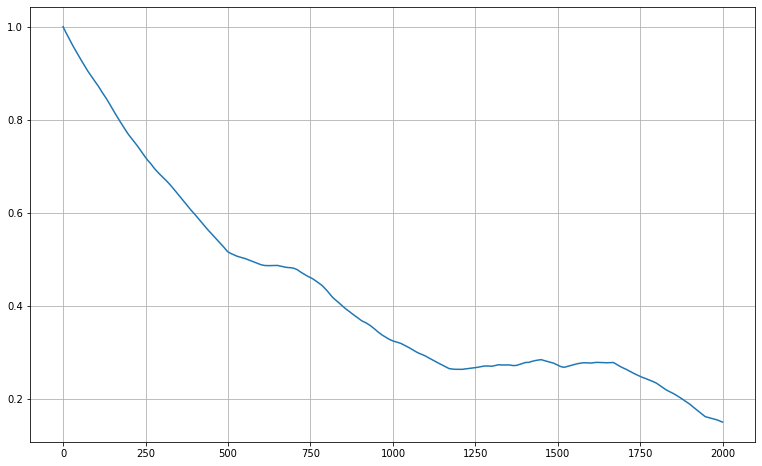

In [68]:
plt.figure(figsize=(13,8))
plt.plot(rg2_corr)
plt.grid()
plt.show()

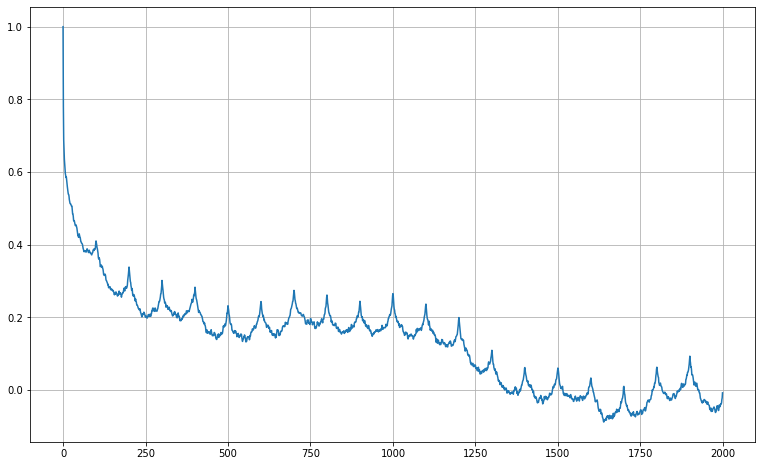

In [69]:
plt.figure(figsize=(13,8))
plt.plot(ene_corr)
plt.grid()
plt.show()

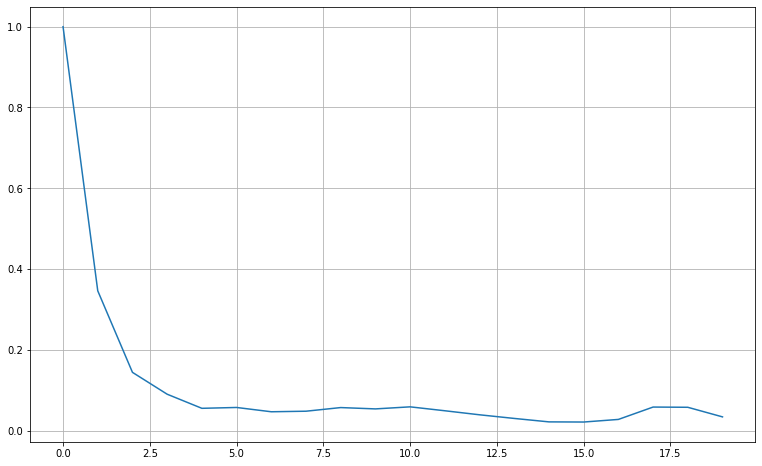

In [70]:
plt.figure(figsize=(13,8))
plt.plot(magne_corr[:20])
plt.grid()
plt.show()

In [16]:
def block_analysis(samples):
    block_errors = []
    block_avgs = []
    block_lengths = []
    o_nblocks = 0
    count = 0
    for i in range(len(samples),0,-1):
        l_block = i
        nblocks = int(len(samples)/l_block)
        if (nblocks != o_nblocks):
            block_avgs.append([])
            for j in range(nblocks):
                block_avgs[count].append(np.mean(samples[j*l_block:(j+1)*l_block]))
            error = np.std(block_avgs[count])/np.sqrt(nblocks)
            block_errors.append(error)
            block_lengths.append(l_block)
            o_nblocks += 1
            count += 1
            
    return (np.array(block_errors),np.array(block_lengths))
  

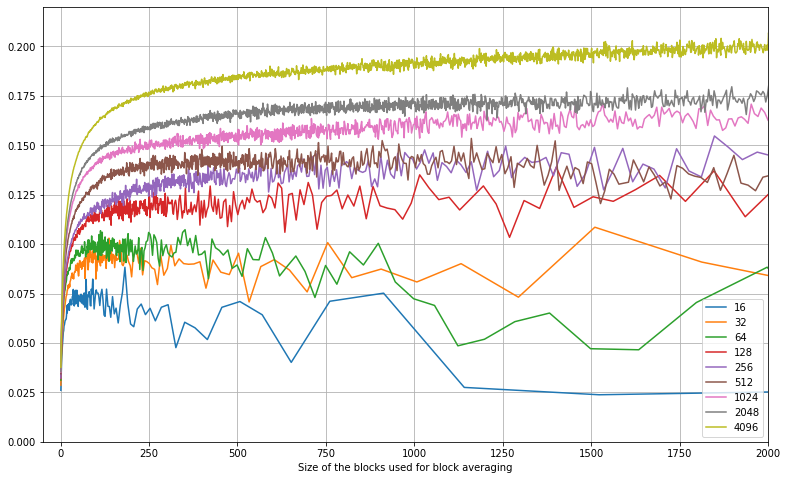

In [18]:
plt.figure(figsize=(13,8))
for i in range(len(sizes)):
#for i in range(3):
    plt.plot(BA_ree2[i][1], BA_ree2[i][0], label=sizes[i])
plt.xlabel("Size of the blocks used for block averaging")
plt.xlim((-50,2000))
plt.ylim((0,0.22))
plt.legend()
plt.grid()
plt.show()

In [20]:
#Gewecke
for i in range(len(sizes)):
    print(np.var(Ree2[i][:1000]), np.var(Ree2[i][1000:]))

3.274616517321139 3.043556360410848
7.502443988854828 7.435830022868948
14.012249148026614 17.740448218784234
41.71959434347697 41.87236384941102
111.03373605203907 94.14735899417285
276.6363795230527 218.64947591195795
558.7616917961628 506.95044757122014
1111.6425945744513 1150.8022341457913
3047.343794804975 2627.6432407500956
